colab of thunderman9795@gmail.com

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/content/data"))

['train.csv', '.ipynb_checkpoints', 'test.csv']


In [ ]:

df = pd.read_csv("/content/data/test.csv")

In [ ]:

df.head()

,autor,number of conversation,percent of conversations started by the author,difference between two preceding lines in seconds,number of messages sent,average percent of lines in conversation,average percent of characters in conversation,number of characters sent by the author,mean time of messages sent,number of unique contacted authors,avg number of unique authors interacted with per conversation,total unique authors and unique per chat difference,conversation num and total unique authors difference,average question marks per conversations,total question marks,total author question marks,avg author question marks,author and conversation quetsion mark differnece,author total negative in author conv,author total neutral in author conv,author total positive in author conv,authortotal compound in author conv,pos word count author,neg word count author,prof word count author,is sexual predator
0,0bd1058873b5a188883f69af49d4f526,1,0.0,30.0,3,0.600000,0.600000,9,960,2,2,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0,0,0
1,0bd137b1a18ad9b5ac99b9ace16c43d1,1,0.0,30.0,3,0.750000,0.526316,10,300,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0,0
2,0bd16e648dd9eddfe281397c1d2c573e,1,0.0,0.0,2,0.500000,0.600000,6,13560,2,2,0,1,1,1,1,1,0,0.0,1.0,0.0,0.0,0,0,0,0
3,0bd1d040a8ded22218e70a962354d6fc,1,0.0,0.0,2,0.500000,0.360000,9,57960,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0,0
4,0bd1d1022a36c48dcee514fc3a06127a,1,1.0,0.0,2,0.666667,0.087912,8,40380,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0,0


In [ ]:
df.rename(columns = {'is sexual predator':'target','number of conversation':''}, inplace = True)


In [ ]:
df.target.value_counts()

SyntaxError: ignored

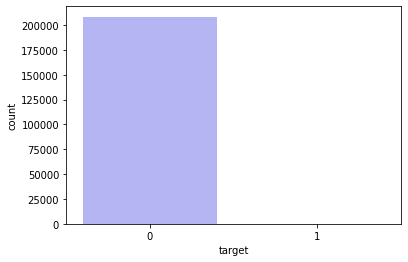

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [ ]:
df.groupby('target').mean()

,number of conversation,percent of conversations started by the author,difference between two preceding lines in seconds,number of messages sent,average percent of lines in conversation,average percent of characters in conversation,number of characters sent by the author,mean time of messages sent,number of unique contacted authors,avg number of unique authors interacted with per conversation,total unique authors and unique per chat difference,conversation num and total unique authors difference,average question marks per conversations,total question marks,total author question marks,avg author question marks,author and conversation quetsion mark differnece,author total negative in author conv,author total neutral in author conv,author total positive in author conv,authortotal compound in author conv,pos word count author,neg word count author,prof word count author
target,,,,,,,,,,,,,,,,,,,,,,,,
0,1.576999,0.488495,131.442696,9.116383,0.484934,0.485296,360.388615,42831.559739,4.343086,2.688230,1.654856,3.097674,3.310926,7.663664,1.717324,1.098926,5.946339,0.029251,0.913930,0.055155,0.076102,1.364577,0.726823,0.137361
1,14.946939,0.810898,2310.169602,260.624490,0.717131,0.744744,6153.322449,62707.591837,1.942857,0.297959,1.644898,13.216327,5.342857,67.155102,36.942857,2.963265,30.212245,0.049216,0.828547,0.122245,0.714145,47.102041,16.106122,3.167347


In [ ]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x_data = x_data.drop(['autor'], axis = 1)

In [ ]:
x_data.head()

,number of conversation,percent of conversations started by the author,difference between two preceding lines in seconds,number of messages sent,average percent of lines in conversation,average percent of characters in conversation,number of characters sent by the author,mean time of messages sent,number of unique contacted authors,avg number of unique authors interacted with per conversation,total unique authors and unique per chat difference,conversation num and total unique authors difference,average question marks per conversations,total question marks,total author question marks,avg author question marks,author and conversation quetsion mark differnece,author total negative in author conv,author total neutral in author conv,author total positive in author conv,authortotal compound in author conv,pos word count author,neg word count author,prof word count author
0,1,0.0,30.0,3,0.600000,0.600000,9,960,2,2,0,1,0,0,0,0,0,0.0,1.0,0.0,0.0,0,0,0
1,1,0.0,30.0,3,0.750000,0.526316,10,300,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0
2,1,0.0,0.0,2,0.500000,0.600000,6,13560,2,2,0,1,1,1,1,1,0,0.0,1.0,0.0,0.0,0,0,0
3,1,0.0,0.0,2,0.500000,0.360000,9,57960,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0
4,1,1.0,0.0,2,0.666667,0.087912,8,40380,2,2,0,1,2,2,1,1,1,0.0,1.0,0.0,0.0,0,0,0


In [ ]:

x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [ ]:
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head


In [ ]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [ ]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    return parameters, gradients

In [ ]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Manuel Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

Manuel Test Accuracy: 99.89%


In [ ]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 99.89%


In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 99.91%


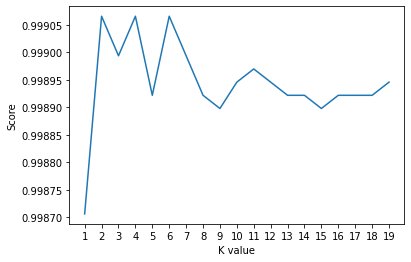

Maximum KNN Score is 99.91%


In [ ]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 99.89%


In [ ]:
import pickle

In [ ]:
pickle.dump(svm, open('svmmodel.pkl','wb'))

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 98.86%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 99.91%


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 99.93%


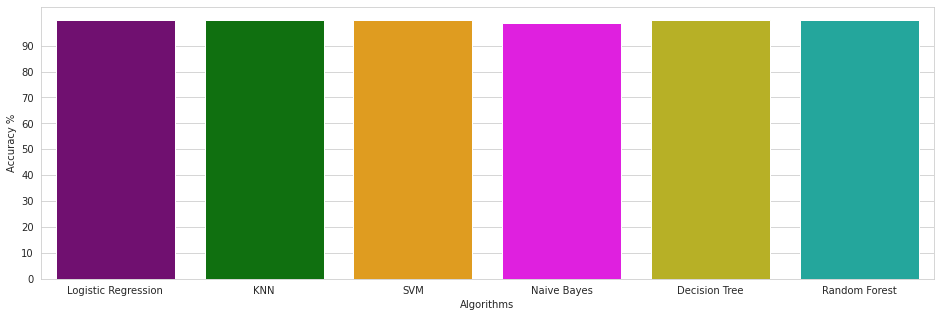

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
loaded_model=pickle.load(open('/content/svmmodel.pkl','rb'))

In [ ]:
loaded_model.predict([np.array([1,0,30,3,0.6,0.6,9,960,2,2,0,1,0,0,0,0,0,0,1,0,0,0,0,0])])[0]

0